## FINANCIAL ANALYTICS LAB
### NAME : Kshitij Chilate
### BRANCH : Data Science
### SECTION: B
### ROLL NO : 35
### DATE: 12/08/2025


## Theory

Portfolio Performance refers to evaluating how a group of financial assets perform together.

Returns can be calculated:
1. Daily Return:Percentage change in asset price day over day.
2. Annualized Return:Scales daily return to yearly,assuming 252 trading days.

Risk is measured using:
  1. Standard Deviation: Volatility in returns.
  2. Share Ratio : Risk-adjusted return.

The Sharpe Ratio is defined as:
   Sharpe Ratio=(Mean Portfolio Return - Risk-Free Rate)/Standard Deviation of Portfolio Return




## Portfolio Risk and Return

Portfolio: Acollection of financial assets like stocks,bonds,etc. Portfolio analysis involves tractking the performance and risk of a group of assets as a single entity.

Return: The gain or loss on a Portfolio,expressed as percentage. Can be calculated daily,monthly.or annualy

Risk: Represents the uncertainity in returns, measured ysing standard deviation(volatility).

Sharp Ratio: Developed by William Sharpe, it evaluates the return of an investment compared to its risk. A higher Sharpe ratio indicates better risk=adjusted performance.

Portfolio Diversification: Combining assets with low or negative correlation reduces overall risk.

## Real-World Appilation

Portfolio performance analysis is used by:
  1. Mutual fund managers to evaluate fund performance.
  2. Wealth advisors to rebalance client portfolios.
  3. Retail investors to understand if returns justify the risk taken

Example: A mutual fund with a Sharpe ratio of 1.2 is considered better than one with 0.8 for the same return, as it takes less risk.



## ** Case Study: FAANG Portfolio Performance(2020-2023) **
Consider a portfolio with equal investment in Facebook(META), Amazon, Apple, Netflix, and Google(Aplhabet) from Jan 2020 to Jan 2023

1. We can calculate the cummulative return of this portfolio.
2. Compute volatility and Sharpe Ratio to determine if this aggressive tech portfolio outperformed the market risk-adjusted.
3.This helps understand diversification even among correlated tech stocks.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('seaborn-v0_8')

In [ ]:
# Download stock data for a sample portfolio(e.g. Apple,Microsoft,Google)
tickers = ['AAPL','MSFT','GOOGL']
data = yf.download(tickers,start='2020-01-01',end='2024-01-01', auto_adjust= False)
data = data['Adj Close'] # Works because we re-enable multi-column structure
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.538513,68.026024,153.042297
2020-01-03,71.833298,67.670158,151.136642
2020-01-06,72.405678,69.473846,151.527313
2020-01-07,72.065155,69.339645,150.145737
2020-01-08,73.224426,69.833191,152.537292


In [ ]:
# Calculate Daily Return
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-03,-0.009722,-0.005231,-0.012452
2020-01-06,0.007968,0.026654,0.002585
2020-01-07,-0.004703,-0.001932,-0.009118
2020-01-08,0.016086,0.007118,0.015928
2020-01-09,0.021241,0.010498,0.012493


In [ ]:
# Simulate an equally weighted portfolio
weights = np.array([1/len(tickers)]*len(tickers))  #creates a list repeating that equal weight
portfolio_returns = daily_returns.dot(weights)     #matrix multiplication #avg. performance
portfolio_returns.head()

,0
Date,
2020-01-03,-0.009135
2020-01-06,0.012402
2020-01-07,-0.005251
2020-01-08,0.013044
2020-01-09,0.014744


In [ ]:
#Risk Metrics
mean_daily_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()
annualized_return = mean_daily_return * 252
annualized_std = std_daily_return * np.sqrt(252)
risk_free_rate = 0.04 / 252  #Assume 4% annual
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_dev

print(f"Mean Daily Return: {mean_daily_return:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")
print(f"Standard Deviation of Daily Return: {std_dev:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Mean Daily Return: 0.0011
Annualized Return: 0.2700
Standard Deviation of Daily Return: 0.0191
Sharpe Ratio: 0.0478


## Tasks for Students

1. Modify the portfolio to include 5 Indian companies (e.g.,INFY, TCS, HDFC,RELIANCE,ITC).
2. Compare the Sharpe Ratio with the US Tech Portfolio (FAANG).
3. Add visualization of rolling standard deviation over time.
4. Write a reflection on how diversification impacted risk in your custom portfolio.
5. Try portfolio weights other than equal and observe changes in return and risk.

In [ ]:
# Task 1: Modify the portfolio to include 5 Indian companies
indian_tickers = ['INFY.NS', 'TCS.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'ITC.NS']
indian_data = yf.download(indian_tickers, start='2020-01-01', end='2024-01-01', auto_adjust=False)
indian_data = indian_data['Adj Close']
indian_data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,HDFCBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-01-01,1214.072510,646.518738,186.567200,678.021423,1986.125488
2020-01-02,1221.811279,644.632324,187.938400,689.564331,1977.008423
2020-01-03,1204.387207,654.546997,186.880585,690.395203,2016.408203
2020-01-06,1178.322632,648.273560,184.216446,674.383362,2016.225708
2020-01-07,1196.980835,638.665955,184.412354,684.758606,2021.173462


In [ ]:
# Calculate Daily Return for Indian Portfolio
indian_daily_returns = indian_data.pct_change().dropna()

# Simulate an equally weighted Indian portfolio
indian_weights = np.array([1/len(indian_tickers)]*len(indian_tickers))
indian_portfolio_returns = indian_daily_returns.dot(indian_weights)
indian_portfolio_returns.head()

,0
Date,
2020-01-02,0.004648
2020-01-03,0.003325
2020-01-06,-0.013753
2020-01-07,0.003983
2020-01-08,-0.001189


In [ ]:
# Calculate Risk Metrics for Indian Portfolio
indian_mean_daily_return = indian_portfolio_returns.mean()
indian_std_dev = indian_portfolio_returns.std()
indian_annualized_return = indian_mean_daily_return * 252
indian_annualized_std = indian_std_dev * np.sqrt(252)
indian_sharpe_ratio = (indian_mean_daily_return - risk_free_rate) / indian_std_dev

print("Indian Portfolio Metrics:")
print(f"Mean Daily Return: {indian_mean_daily_return:.4f}")
print(f"Annualized Return: {indian_annualized_return:.4f}")
print(f"Standard Deviation of Daily Return: {indian_std_dev:.4f}")
print(f"Sharpe Ratio: {indian_sharpe_ratio:.4f}")

Indian Portfolio Metrics:
Mean Daily Return: 0.0008
Annualized Return: 0.2053
Standard Deviation of Daily Return: 0.0127
Sharpe Ratio: 0.0518


In [ ]:
# Task 2: Compare the Sharpe Ratio with the US Tech Portfolio
print("Sharpe Ratio Comparison:")
print(f"US Tech Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Indian Portfolio Sharpe Ratio: {indian_sharpe_ratio:.4f}")

Sharpe Ratio Comparison:
US Tech Portfolio Sharpe Ratio: 0.0478
Indian Portfolio Sharpe Ratio: 0.0518


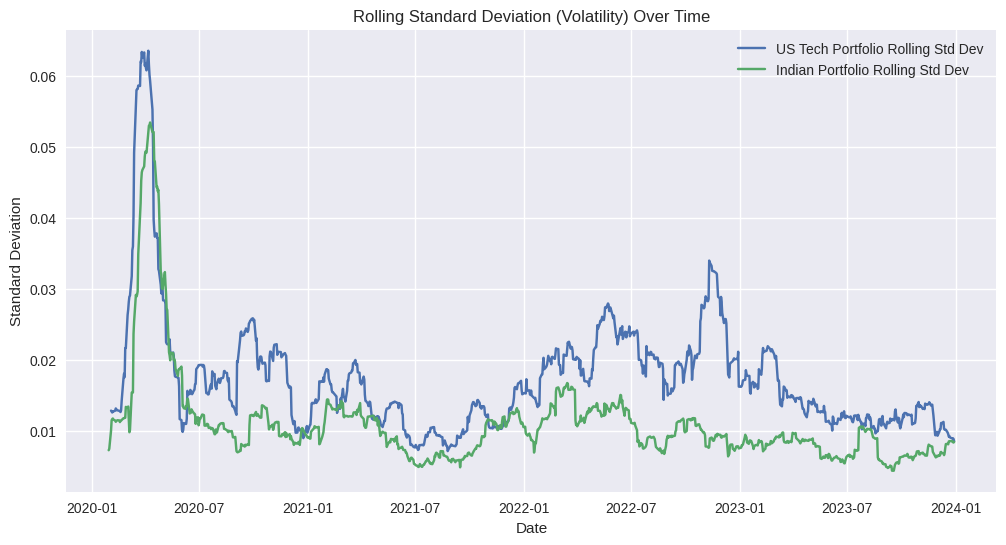

In [ ]:
# Task 3: Add visualization of rolling standard deviation over time
rolling_window = 21 # Approx one month of trading days
us_rolling_std_dev = portfolio_returns.rolling(window=rolling_window).std()
indian_rolling_std_dev = indian_portfolio_returns.rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(us_rolling_std_dev, label='US Tech Portfolio Rolling Std Dev')
plt.plot(indian_rolling_std_dev, label='Indian Portfolio Rolling Std Dev')
plt.title('Rolling Standard Deviation (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

### Task 4
Diversifying into the Indian market appears to have lowered overall portfolio risk compared to the US Tech portfolio, as shown by lower volatility in the rolling standard deviation plot. The Indian portfolio also had a slightly better risk-adjusted return (Sharpe Ratio) over the analyzed period. This highlights how diversifying across different markets can reduce risk.

In [ ]:
# Task 5: Try portfolio weights other than equal and observe changes in return and risk.

# Define custom weights (example: higher weight for RELIANCE.NS)
custom_weights = np.array([0.15, 0.15, 0.20, 0.30, 0.20])

if np.sum(custom_weights) != 1:
    print("Error: Custom weights must sum to 1.")
else:
    custom_portfolio_returns = indian_daily_returns.dot(custom_weights)

    custom_mean_daily_return = custom_portfolio_returns.mean()
    custom_std_dev = custom_portfolio_returns.std()
    custom_annualized_return = custom_mean_daily_return * 252
    custom_annualized_std = custom_std_dev * np.sqrt(252)
    custom_sharpe_ratio = (custom_mean_daily_return - risk_free_rate) / custom_std_dev

    print("\nCustom Weighted Indian Portfolio Metrics:")
    print(f"Mean Daily Return: {custom_mean_daily_return:.4f}")
    print(f"Annualized Return: {custom_annualized_return:.4f}")
    print(f"Standard Deviation of Daily Return: {custom_std_dev:.4f}")
    print(f"Sharpe Ratio: {custom_sharpe_ratio:.4f}")


Custom Weighted Indian Portfolio Metrics:
Mean Daily Return: 0.0008
Annualized Return: 0.2078
Standard Deviation of Daily Return: 0.0129
Sharpe Ratio: 0.0516


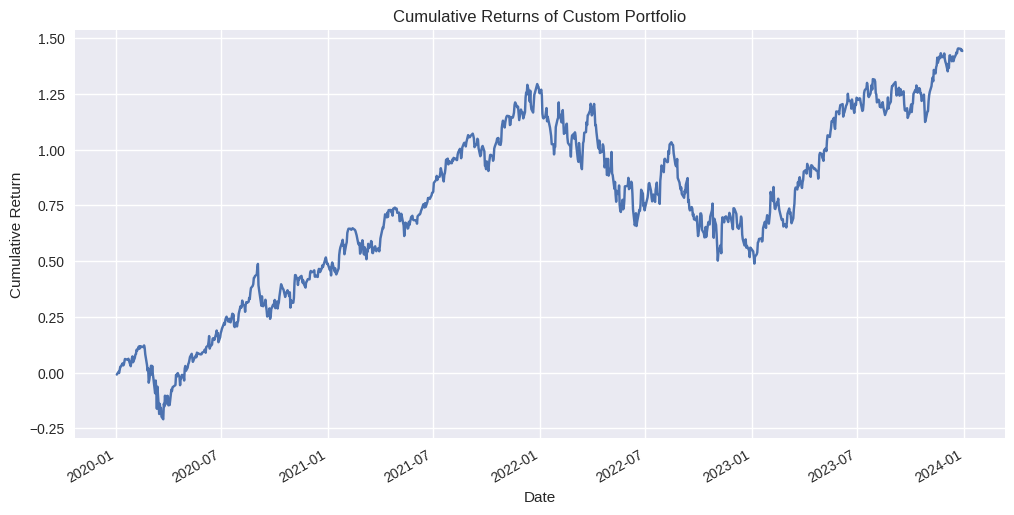

In [ ]:
#Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.plot(figsize=(12, 6))
plt.title('Cumulative Returns of Custom Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()